In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
!unrar x drive/MyDrive/sorted_data.rar

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
Extracting  sorted_data/train/scab/a10782c3de6f75b0.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a11a9ec3d805677e.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a12cde80caedc557.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a13f87e591dfa108.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a15a6aeb3ceb1521.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a16c934ba6cc9cec.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a16ec5864adea78c.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a186c6d87a212fcf.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a1874e8c18f95be3.jpg                   72%  OK 
Extracting  sorted_data/train/scab/a18af4fb4b83f890.jpg                   72%  OK 
Extracting  sor

In [6]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "sorted_data/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 16632 files belonging to 12 classes.
Found 1000 files belonging to 12 classes.
Found 1000 files belonging to 12 classes.


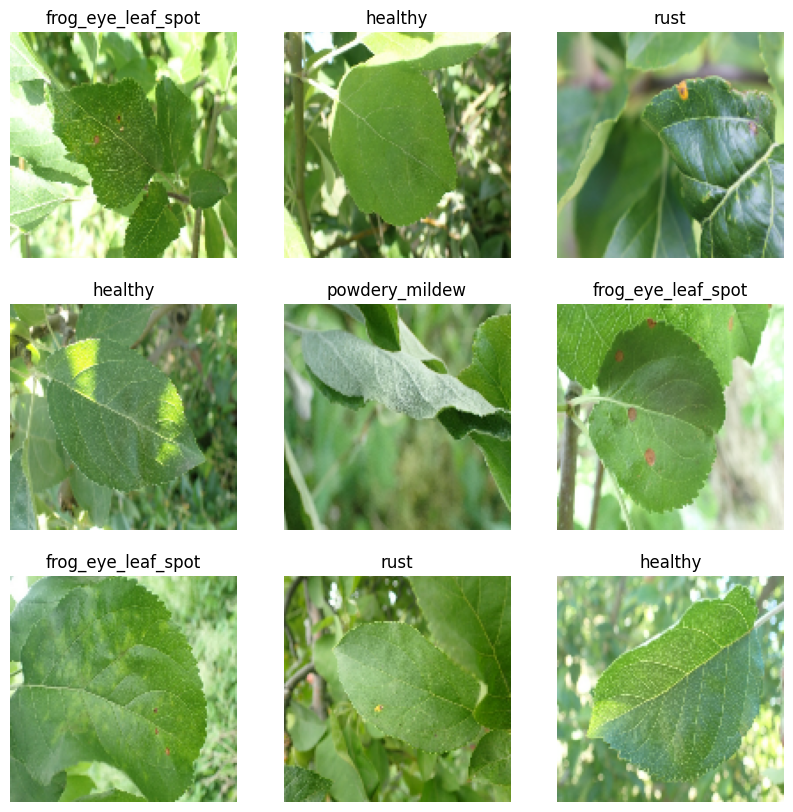

In [7]:
class_names = ["complex", "frog_eye_leaf_spot", "frog_eye_leaf_spot complex", "healthy", "powdery_mildew", "powdery_mildew complex", "rust", "rust complex", "rust frog_eye_leaf_spot", "scab", "scab frog_eye_leaf_spot", "scab frog_eye_leaf_spot complex"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(12)
    ]
)

In [9]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [10]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
832/832 [==============================] - 412s 493ms/step - loss: 1.6556 - accuracy: 0.3944 - val_loss: 1.5150 - val_accuracy: 0.4590
Epoch 2/10
832/832 [==============================] - 399s 479ms/step - loss: 1.3119 - accuracy: 0.5394 - val_loss: 1.1682 - val_accuracy: 0.5900
Epoch 3/10
832/832 [==============================] - 401s 481ms/step - loss: 1.0186 - accuracy: 0.6418 - val_loss: 1.0633 - val_accuracy: 0.6430
Epoch 4/10
832/832 [==============================] - 401s 480ms/step - loss: 0.8183 - accuracy: 0.7126 - val_loss: 1.0006 - val_accuracy: 0.6740
Epoch 5/10
832/832 [==============================] - 409s 491ms/step - loss: 0.6445 - accuracy: 0.7759 - val_loss: 1.0309 - val_accuracy: 0.6850
Epoch 6/10
832/832 [==============================] - 412s 495ms/step - loss: 0.4721 - accuracy: 0.8312 - val_loss: 1.0877 - val_accuracy: 0.6790
Epoch 7/10
832/832 [==============================] - 409s 491ms/step - loss: 0.3248 - accuracy: 0.8847 - val_loss: 1.2974 -

In [11]:
model.evaluate(test_ds)

50/50 [==============================] - 10s 186ms/step - loss: 1.6899 - accuracy: 0.6910


[1.6898601055145264, 0.6909999847412109]

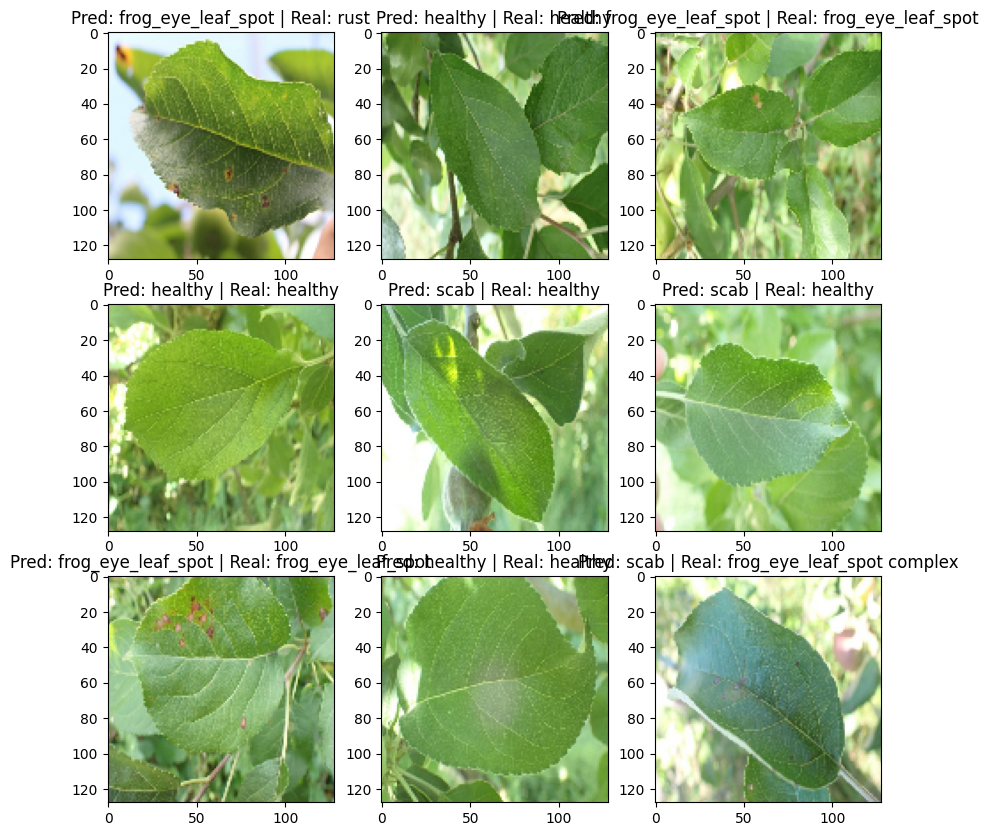

In [12]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)